## Tasks:

- Write a python function to calculate the rayleigh cross-section of H, H2, He for a given specified wavelength
- Make a plot of these cross-sections as a function of wavelength to verify the output
- Write a function that:  given arbitrary mixing ratios of H2, H, and He, a pressure and temperature (and assuming an ideal gas for now)
         -computes the density of the gas and the mean molecular weight of the gas
- Then, using the functions you've written so far, calculate the total opacity due to Rayleigh scattering (from H, H2, He) for a specified wavelength
- Make a plot of total wavelength-dependent Rayleigh scattering opacity as a function of wavelength to verify the output
- Write a routine that completes a numerical integral over wavelength to compute the Rosseland mean opacity.

In [1]:
import math
import numpy as np
import scipy
import scipy.constants as spc
import matplotlib.pyplot as plt

In [2]:
#Rayleigh cross-section for H

def RayH(L):
    if L>0:
            RayH = (5.799e-13/L**4) + (1.422e-6/L**6) + (2.784/L**8)
            return RayH
    else:
        print("cannot divide by 0")

RayH(800)

2.34342041015625e-23

In [3]:
#Rayleigh cross-section for H2
#Wavelength L must be in angstroms. Output is cross section in cm^2. No need to convert cross section!
#Analytic solution only valid in long wavelength limit, ie L > ~3000 angstroms

def RayH2(L):
    if L>0:
            RayH2 = (8.14e-13/L**4) + (1.28e-6/L**6) + (1.61/L**8)
            return RayH2
    else:
        print("cannot divide by 0")
        
RayH2(800)

1.646646499633789e-23

1.3380959999999999e+22
2.090775000000002e+20
1.8355226337448626e+19
3.2668359375000197e+18
8.563814400000086e+17
2.8680041152263795e+17


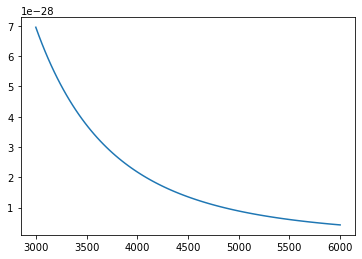

In [120]:
#Rayleigh cross-section for He

def RayHe(L):
    if L>0:
        RayHe = (5.484e-14/L**4)*(1+(2.44e5/L**2))
        return RayHe
    else:
        print("cannot divide by 0")
        
print(RayHe(1e-5))
print(RayHe(2e-5))
print(RayHe(3e-5))
print(RayHe(4e-5))
print(RayHe(5e-5))
print(RayHe(6e-5))

L = np.linspace(3000, 6000, 100)
RayHe = (5.484e-14/L**4)*(1+(2.44e5/L**2))
plt.plot(L, RayHe)
plt.show()

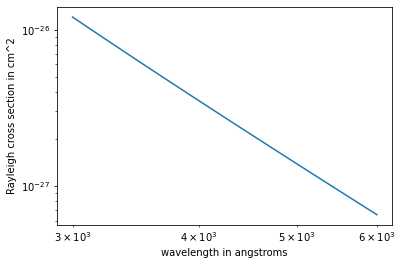

[ -4.18607844 -26.1853824 ]


In [149]:
#H2 rayleigh cross section plot from dalgarno and williams (1962)
#wavelength in angstroms, cross section in cm^2
#wavelength for plot is converted from angstroms to cm
#exact form valid only in long wavelength limit (L > ~3000 angstroms)

L = np.linspace(3000, 6000, 100)
RayH2 = (8.14e-13/L**4) + (1.28e-6/L**6) + (1.61/L**8)
#plt.xlim(1e-5, 6e-5)
#plt.ylim(0,18e39)
plt.plot(L, RayH2)
plt.xscale("log")
plt.yscale("log")
plt.xlabel('wavelength in angstroms')
plt.ylabel('Rayleigh cross section in cm^2')
plt.show(block=True)

print(np.polyfit(np.log(L), np.log(RayH2), 1))

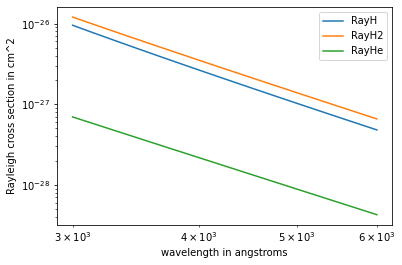

[ -4.29424146 -25.56514679]
[ -4.18607844 -26.1853824 ]
[ -4.02721128 -30.29250936]


In [150]:
#Rayleigh cross-section plots for H, H2, He

L = np.linspace(3000, 6000, 100)

RayH = ((5.799e-13)/L**4) + ((1.422e-6)/L**6) + (2.784/L**8)
RayH2 = ((8.14e-13)/L**4) + ((1.28e-6)/L**6) + (1.61/L**8)
RayHe = ((5.484e-14)/L**4) * (1+((2.44e5)/L**2))

plt.plot(L, RayH, label='RayH')
plt.plot(L, RayH2, label='RayH2')
plt.plot(L, RayHe, label='RayHe')
plt.xlabel('wavelength in angstroms')
plt.ylabel('Rayleigh cross section in cm^2')
plt.xscale("log")
plt.yscale("log")
#plt.xlim(1e-5, 6e-5)
#plt.ylim(0,18e39)
#plt.legend([RayH, RayH2, RayHe], ['RayH', 'HayH2', 'RayHe'])
plt.legend()
plt.show()

print(np.polyfit(np.log(L), np.log(RayH), 1))
print(np.polyfit(np.log(L), np.log(RayH2), 1))
print(np.polyfit(np.log(L), np.log(RayHe), 1))

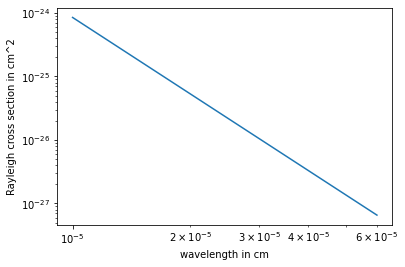

[  -4.         -101.47744018]


In [142]:
#test case for full solution for RayH2

L = np.linspace(1e-5, 6e-5, 100)

RayH2 = (8.49e-45)/L**4

plt.plot(L, RayH2, label='RayH2')
plt.xlabel('wavelength in cm')
plt.ylabel('Rayleigh cross section in cm^2')
plt.xscale("log")
plt.yscale("log")
plt.show()
print(np.polyfit(np.log(L), np.log(RayH2), 1))

In [30]:
#routine to convert to number fractions if mass fractions are given

def nH(X, density):
    #X - mass fraction of H
    nH = X*density/spc.m_p #H number density
    return nH
def nH2(Y, density):
    #Y - mass fraction of H2
    nH2 = Y*density/(2*spc.m_p) #H2 number density
    return nH2

def nHe(Z, density):
    #Z - mass fraction of He
    nHe = Z*density/((2*spc.m_p)+(2*spc.m_n)) #He number density
    return nHe

#total number density
def n(nH, nH2, nHe):
    n = nH + nH2 + nHe
    return n

def numH(nH, n):
    numH = nH/n
    return numH

def numH2(nH2, n):
    numH2 = nH2/n
    return numH2

def numHe(nHe, n):
    numHe = nHe/n
    return numHe

In [19]:
print(spc.m_p)

1.67262192369e-27


In [95]:
#assume ideal gas for now: PV=NkT

#total mean molecular weight
def mu(numH, numH2, numHe):
    mH = scp.m_p #mass of H atom in kg
    mH2 = 2*scp.m_p #mass of H2 in kg
    mHe = (2*scp.m_p)+(2*scp.m_n) #mass of He in kg
    mu = numH*mH + numH2*mH2 + numHe*mHe
    return mu

#total gas density
def density(mu, P, T):
    density = (P*mu*scp.m_p)/((scp.k)*T)
    return density

In [96]:
#individual Rayleigh scattering opacities for H, H2, He

def kappa(mu, numH, numH2, numHe, RayH, RayH2, RayHe):
    kappa = (1/mu)*[numH*RayH + numH2*RayH2 + numHe*RayHe]
    return kappa

(100,)
(100,)
2.9882889244925947e+26
[5.36248448e+66 3.61560427e+66 2.48333678e+66 1.73463775e+66
 1.23047250e+66 8.85266690e+65 6.45252836e+65 4.76002483e+65
 3.55082446e+65 2.67637933e+65 2.03684254e+65 1.56416239e+65
 1.21135270e+65 9.45576826e+64 7.43624976e+64 5.88916359e+64
 4.69486768e+64 3.76621424e+64 3.03915725e+64 2.46623107e+64
 2.01197691e+64 1.64970490e+64 1.35918107e+64 1.12496087e+64
 9.35178871e+63 7.80662752e+63 6.54280152e+63 5.50453637e+63
 4.64798157e+63 3.93848317e+63 3.34851947e+63 2.85612935e+63
 2.44370902e+63 2.09708575e+63 1.80480117e+63 1.55755396e+63
 1.34776439e+63 1.16923252e+63 1.01686866e+63 8.86480040e+62
 7.74601080e+62 6.78357976e+62 5.95360160e+62 5.23613000e+62
 4.61447333e+62 4.07462385e+62 3.60479375e+62 3.19503684e+62
 2.83693914e+62 2.52336494e+62 2.24824786e+62 2.00641843e+62
 1.79346133e+62 1.60559695e+62 1.43958289e+62 1.29263165e+62
 1.16234198e+62 1.04664116e+62 9.43736591e+61 8.52075013e+61
 7.70308055e+61 6.97263102e+61 6.31918603e+61 5.

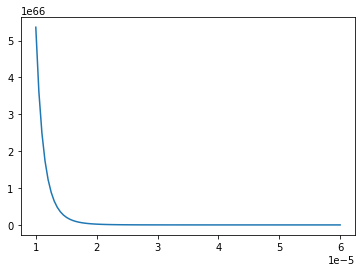

In [4]:
#plotting total opacity from Rayleigh scattering of H, H2, He
import scipy.constants as scp
import matplotlib.pyplot as plt

P = 100 #pascals
T = 100 #kelvin
numH = 0.5
numH2 = 0.25
numHe = 0.25
mH = scp.m_p #mass of H atom in kg
mH2 = 2*scp.m_p #mass of H2 in kg
mHe = (2*scp.m_p)+(2*scp.m_n) #mass of He in kg

L = np.linspace(1e-5, 6e-5, 100)
print(L.shape)
#print(L)

RayH = (5.799e-13/L**4) + (1.422e-6/L**6) + (2.784/L**8)
print(RayH.shape)
RayH2 = (8.14e-13/L**4) + (1.28e-6/L**6) + (1.61/L**8)
RayHe = (5.484e-14/L**4) * (1+(2.44e5/L**2))
mu = numH*mH + numH2*mH2 + numHe*mHe
print(1/mu)
density = (P*mu*scp.m_p)/(scp.k*T)
#print(type(density))
a = float(1/mu)
b = (numH*RayH) + (numH2*RayH2) + (numHe*RayHe)
kappa = a*b
print(kappa)

plt.plot(L, kappa)
#plt.plot(L, b)
#plt.show()
#b = np.vectorize((numH*RayH) + (numH2*RayH2) + (numHe*RayHe))
#kappa = np.multiply(a, b)

#kappa = (flatten(float(1/mu))*flatten([float(numH*RayH + numH2*RayH2 + numHe*RayHe)])      

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


/var/folders/_x/x_nwl67x63z8qvnpv7h3_73w0000gn/T/ipykernel_86085/281018015.py:25: RuntimeWarning: overflow encountered in exp
  diffB_L = lambda L: ((2*(h**2)*(c**3)/(((L/1e10)**6)*k))*np.exp((h*c)/((L/1e10)*k*T)))/((T**2)*(np.exp((h*c)/((L/1e10)*k*T))-1)**2)
/var/folders/_x/x_nwl67x63z8qvnpv7h3_73w0000gn/T/ipykernel_86085/281018015.py:25: RuntimeWarning: invalid value encountered in double_scalars
  diffB_L = lambda L: ((2*(h**2)*(c**3)/(((L/1e10)**6)*k))*np.exp((h*c)/((L/1e10)*k*T)))/((T**2)*(np.exp((h*c)/((L/1e10)*k*T))-1)**2)
/var/folders/_x/x_nwl67x63z8qvnpv7h3_73w0000gn/T/ipykernel_86085/281018015.py:25: RuntimeWarning: overflow encountered in double_scalars
  diffB_L = lambda L: ((2*(h**2)*(c**3)/(((L/1e10)**6)*k))*np.exp((h*c)/((L/1e10)*k*T)))/((T**2)*(np.exp((h*c)/((L/1e10)*k*T))-1)**2)
/var/folders/_x/x_nwl67x63z8qvnpv7h3_73w0000gn/T/ipykernel_86085/281018015.py:27: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance fro

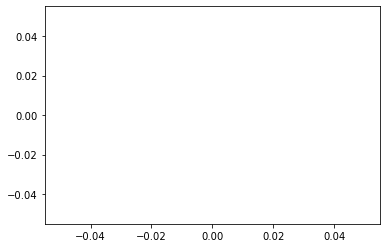

In [93]:
#Rosseland mean opacity - integrated numerically

import numpy as np
import scipy.integrate as integrate

T = np.linspace(100,2600,100)
P = float(100) #pascals
numH = 0.5
numH2 = 0.25
numHe = 0.25
h = scp.h
c = scp.c
k = scp.k
def RossMean(T):
    mH = scp.m_p #mass of H atom in kg
    mH2 = 2*scp.m_p #mass of H2 in kg
    mHe = (2*scp.m_p)+(2*scp.m_n) #mass of He in kg
    mu = numH*mH + numH2*mH2 + numHe*mHe #mean molecular weight in kg
    RayH = lambda L: (1/10000)*((5.799e-13/L**4) + (1.422e-6/L**6) + (2.784/L**8)) 
    RayH2 = lambda L: (1/10000)*((8.14e-13/L**4) + (1.28e-6/L**6) + (1.61/L**8))
    RayHe = lambda L: (1/10000)*((5.484e-14/L**4)*(1+(2.44e5/L**2))) #input angstroms, output m^2
    density = (P*mu*scp.m_p)/((scp.k)*T)
    A = float(1/density) #1/kg
    B = lambda L: (numH*RayH(L)) + (numH2*RayH2(L)) + (numHe*RayHe(L))
    kappa = lambda L: A*B(L)
    diffB_L = lambda L: ((2*(h**2)*(c**3)/(((L/1e10)**6)*k))*np.exp((h*c)/((L/1e10)*k*T)))/((T**2)*(np.exp((h*c)/((L/1e10)*k*T))-1)**2)
    N = 4*scp.sigma*np.power(T,3)/np.pi
    M = integrate.quad(lambda L: (1/kappa(L)*diffB_L(L)), 0, np.inf)[0]
    RossMean = N/M
    return RossMean #units m^2/kg
                                                                        
Q = list(map(RossMean, T))
print(Q)

plt.plot(T,Q)
plt.show()

[  72.19744944  577.5795955  1949.33113481 4620.63676398]
-------------
[72.19744943990962, 577.579595519277, 1949.3311348775596, 4620.636764154216]


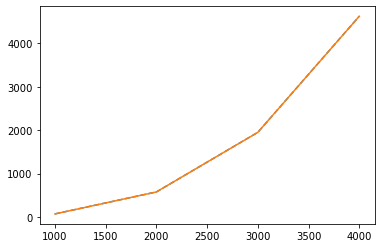

In [20]:
T = [1000,2000,3000,4000]
N = 4*(scp.sigma)*np.power(T,3)/np.pi
print(N)

def M(T):
    diffB_L = lambda L: ((2*(h**2)*(c**3)/((L**6)*k))*np.exp((h*c)/(L*k*T)))/((T**2)*(np.exp((h*c)/(L*k*T))-1)**2)
    P = lambda u: np.log(u)**4/(u-1)**2
    M = (2*scp.k**4*T**3)/(c**2*h**3)*integrate.quad(P, 1, np.inf)[0]
    return M

Q = list(map(M, T))
print("-------------")
print(Q)
plt.plot(T, N, ls="dashed")
plt.plot(T, Q)
plt.show()

[0.45714285712798836, 0.45714285712798836, 0.45714285712798836, 0.45714285712798847, 0.4571428571279882, 0.4571428571279887, 0.45714285712798813, 0.45714285712798863, 0.45714285712799935, 0.4571428571279885, 0.4571428571279885, 0.4571428571279885, 0.45714285712798886, 0.45714285712798863, 0.4571428571279887, 0.4571428571279889, 0.45714285712798874, 0.457142857127989, 0.4571428571279887, 0.4571428571279885, 0.4571428571279886, 0.45714285712798847, 0.4571428571279885, 0.4571428571279885, 0.4571428571279883, 0.45714285712798836, 0.45714285712798847, 0.45714285712798874, 0.4571428571279885, 0.4571428571279882, 0.45714285712798824, 0.45714285712798836, 0.4571428571279882, 0.4571428571279882, 0.45714285712798813, 0.45714285712798813, 0.45714285712798824, 0.4571428571279888, 0.45714285712798997, 0.4571428571279933, 0.4571428571280013, 0.4571428571280199, 0.45714285712806146, 0.4571428571281504, 0.4571428571283359, 0.45714285712870856, 0.45714285712943603, 0.4571428571308149, 0.457142857133358

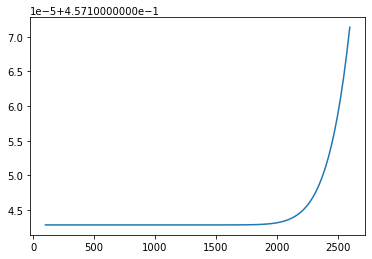

In [187]:
"this is a test cell"

import numpy as np
import scipy.integrate as integrate

T = np.linspace(100,2600,100)
P = float(1e7) #pascals
numH = 0.5
numH2 = 0.25
numHe = 0.25
ang = 1e-10
cm = 1e-2
#ang = 1e-10
#cm = 1e-2
h = scp.h
c = scp.c
k = scp.k
sigma = scp.sigma
def RayH(L):
    L_ang = L/ang
    RayH_cm2 = (5.799e-13/L_ang**4) + (1.422e-6/L_ang**6) + (2.784/L_ang**8)
    return RayH_cm2 * cm**2

def RayH2(L):
    L_ang = L/ang
    RayH2_cm2 = (8.14e-13/L_ang**4) + (1.28e-6/L_ang**6) + (1.61/L_ang**8)
    return RayH2_cm2 * cm**2

def RayHe(L):
    L_ang = L/ang
    RayHe_cm2 = (5.484e-14/L_ang**4)*(1+(2.44e5/L_ang**2))
    return RayHe_cm2 * cm**2

def RossMean(T):
    mH = scp.m_p #mass of H atom in kg
    mH2 = 2*scp.m_p #mass of H2 in kg
    mHe = (2*scp.m_p)+(2*scp.m_n) #mass of He in kg
    mu = numH*mH + numH2*mH2 + numHe*mHe #mean molecular weight in kg
    A = float(1/mu) #1/kg
    B = lambda L: (numH*RayH(L)) + (numH2*RayH2(L)) + (numHe*RayHe(L))
    kappa = lambda L: A*B(L) #units m^2/kg
    #diffB_L = lambda lam: ((2*(h**2)*(c**3)/((lam**6)*k))*np.exp((h*c)/(lam*k*T)))/((T**2)*(np.exp((h*c)/(lam*k*T))-1)**2)
    L = np.linspace(3000*ang,6000*ang)
    #plt.plot(L, 1/kappa(L)*(1/((L**6))*np.exp(h*c/(L*k*T)))/((np.exp((h*c)/(L*k*T))-1)**2))
    #print((1/((L**6)))*1/((2*np.cosh(h*c/(L*k*T)))-2))
    #print(h*c/(L*k*T))
    #raise ValueError
    def sub(logL):
        #L = h*c/(k*T*u)
        #sub = 1/kappa(L)*(np.exp(u)*u**4/((np.exp(u)-1)**2))
        #assert u>0
        L = np.exp(logL)
        return (1/((L**5)))*1/((4*np.cosh((1/2)*h*c/(L*k*T)))**2)
    N = 4*sigma*np.power(T,3)/np.pi
    Lmin = 3000*ang
    M = (2*c**3*h**2/(k*T**2))*10*integrate.quad(sub, np.log(3000*ang), np.log(2), epsabs = 1e-20)[0]
    #print(integrate.quad(sub, 1, np.inf)[0])
    RossMean = N/M
    return RossMean #units m^2/kg
                                                                        
Q = list(map(RossMean, T))
print(Q)
u = np.linspace(1,10)
plt.plot(T,Q)
plt.show()

In [149]:
def integrand(u):
    return np.log(u)**8*np.log(u)**4/(u-1)**2
integrate.quad(integrand, 1, np.inf)

(479119475.34177756, 5.383398532867432)

In [ ]:
1/(np.exp(h*c/(L*k*T)-2+np.exp(h*c/(L*k*T))))
1/((2*np.cosh(h*c/L*k*T))-2)

[0.45714285712798836, 0.45714285712798836, 0.45714285712798836, 0.45714285712798847, 0.4571428571279882, 0.4571428571279887, 0.45714285712798813, 0.45714285712798863, 0.45714285712799935, 0.4571428571279885, 0.4571428571279885, 0.4571428571279885, 0.45714285712798886, 0.45714285712798863, 0.4571428571279887, 0.4571428571279889, 0.45714285712798874, 0.457142857127989, 0.4571428571279887, 0.4571428571279885, 0.4571428571279886, 0.45714285712798847, 0.4571428571279885, 0.4571428571279885, 0.4571428571279883, 0.45714285712798836, 0.45714285712798847, 0.45714285712798874, 0.4571428571279885, 0.4571428571279882, 0.45714285712798824, 0.45714285712798836, 0.4571428571279882, 0.4571428571279882, 0.45714285712798813, 0.45714285712798813, 0.45714285712798824, 0.4571428571279888, 0.45714285712798997, 0.4571428571279933, 0.4571428571280013, 0.4571428571280199, 0.45714285712806146, 0.4571428571281504, 0.4571428571283359, 0.45714285712870856, 0.45714285712943603, 0.4571428571308149, 0.457142857133358

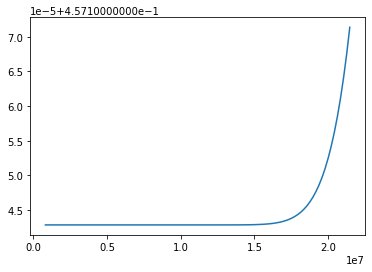

In [192]:
"another test cell - just for H"
import numpy as np
import scipy.integrate as integrate

T = np.linspace(100,2600,100)
P = float(1e7) #pascals
density = 1
numH = 0.5
numH2 = 0.25
numHe = 0.25
ang = 1e-10
cm = 1e-2
#ang = 1e-10
#cm = 1e-2
h = scp.h
c = scp.c
k = scp.k
sigma = scp.sigma
def RayH(L):
    L_ang = L/ang
    RayH_cm2 = (5.799e-13/L_ang**4) + (1.422e-6/L_ang**6) + (2.784/L_ang**8)
    return RayH_cm2 * cm**2

def RayH2(L):
    L_ang = L/ang
    RayH2_cm2 = (8.14e-13/L_ang**4) + (1.28e-6/L_ang**6) + (1.61/L_ang**8)
    return RayH2_cm2 * cm**2

def RayHe(L):
    L_ang = L/ang
    RayHe_cm2 = (5.484e-14/L_ang**4)*(1+(2.44e5/L_ang**2))
    return RayHe_cm2 * cm**2

def nH(numH, numH2, density):
    nH = (2*density/scp.m_p)/(1 + (3*numH2) + numH)*numH
    return nH

def nH2(numH, numH2, density):
    nH2 = (2*density/scp.m_p)/(1+ (3* numH2) +numH)*numH2
    return nH2

mH = scp.m_p #mass of H atom in kg
mH2 = 2*scp.m_p #mass of H2 in kg
mHe = (2*scp.m_p)+(2*scp.m_n) #mass of He in kg
mu = numH*mH + numH2*mH2 #mean molecular weight in kg

def RossMean(T):
    B = lambda L: (nH*RayH(L)) + (nH2*RayH2(L))
    kappa = lambda L: B(L)/density #units m^2/kg
    def sub(logL):
        #L = h*c/(k*T*u)
        #sub = 1/kappa(L)*(np.exp(u)*u**4/((np.exp(u)-1)**2))
        #assert u>0
        L = np.exp(logL)
        return (1/((L**5)))*1/((4*np.cosh((1/2)*h*c/(L*k*T)))**2)
    N = 4*sigma*np.power(T,3)/np.pi
    Lmin = 3000*ang
    cm2perg = 10
    M = (2*c**3*h**2/(k*T**2))*cm2perg*integrate.quad(sub, np.log(Lmin), np.log(2), epsabs = 1e-20)[0]
    RossMean = N/M
    return RossMean #units m^2/kg

P = k*density*T/mu
Q = list(map(RossMean, T))
print(Q)
u = np.linspace(1,10)
plt.plot(P,Q)
plt.show()